In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:

import IPython.display as ipd
import librosa
import librosa.display

In [7]:
filename = "UrbanSound8K/audio/fold1/7383-3-0-1.wav"

In [8]:
librosa_audio_data,librosa_sample_rate = librosa.load(filename)

In [9]:
librosa_audio_data

array([ 0.01675954,  0.02307146,  0.01842667, ..., -0.00196145,
       -0.00163956, -0.00171084], dtype=float32)

In [10]:
librosa_sample_rate

22050

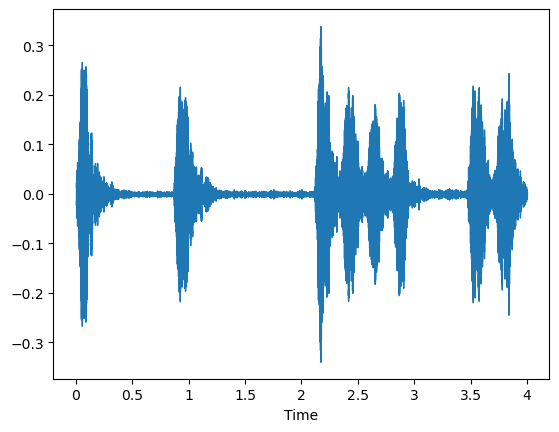

In [11]:
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(filename)

In [12]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [13]:
wave_audio

array([[ 233, 1268],
       [ 188, 1253],
       [ 161, 1235],
       ...,
       [-403,  291],
       [-414,  313],
       [-435,  326]], dtype=int16)

In [14]:
wave_audio

array([[ 233, 1268],
       [ 188, 1253],
       [ 161, 1235],
       ...,
       [-403,  291],
       [-414,  313],
       [-435,  326]], dtype=int16)

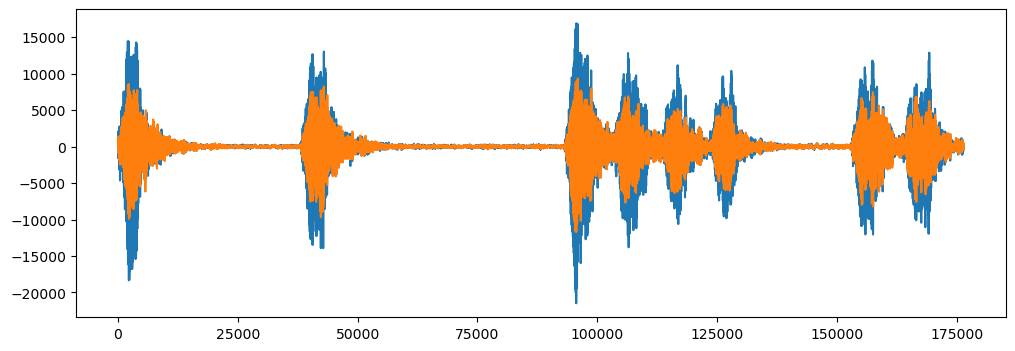

In [15]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.show()

In [16]:
metadata = pd.read_csv('urbansound8k/metadata/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID      start        end  salience  fold  classID  \
0  100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   
1  100648-1-1-0.wav  100648   8.998279  10.052132         2    10        1   
2  100648-1-2-0.wav  100648  16.699509  17.104837         2    10        1   
3  100648-1-3-0.wav  100648  17.631764  19.253075         2    10        1   
4  100648-1-4-0.wav  100648  25.332994  27.197502         2    10        1   

      class  
0  car_horn  
1  car_horn  
2  car_horn  
3  car_horn  
4  car_horn

In [17]:
metadata.shape

(8723, 8)

In [18]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [19]:
metadata.duplicated().sum()

0

In [20]:
#check whether the dataset is balanced/imbalanced
metadata['class'].value_counts()

class
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
dog_bark             999
children_playing     992
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

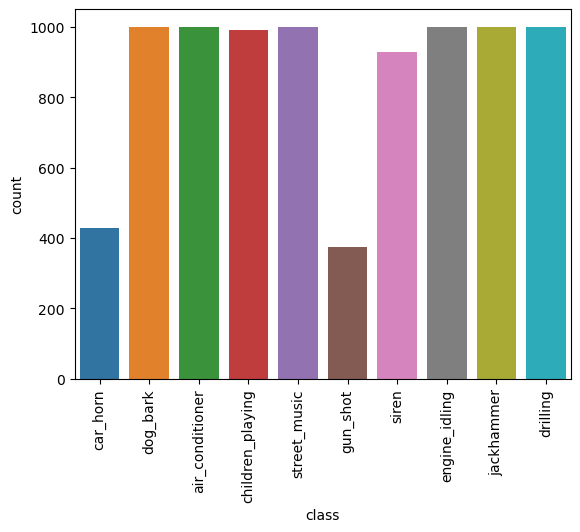

In [21]:
sns.countplot(x='class',data=metadata)
plt.xticks(rotation=90)
plt.show()

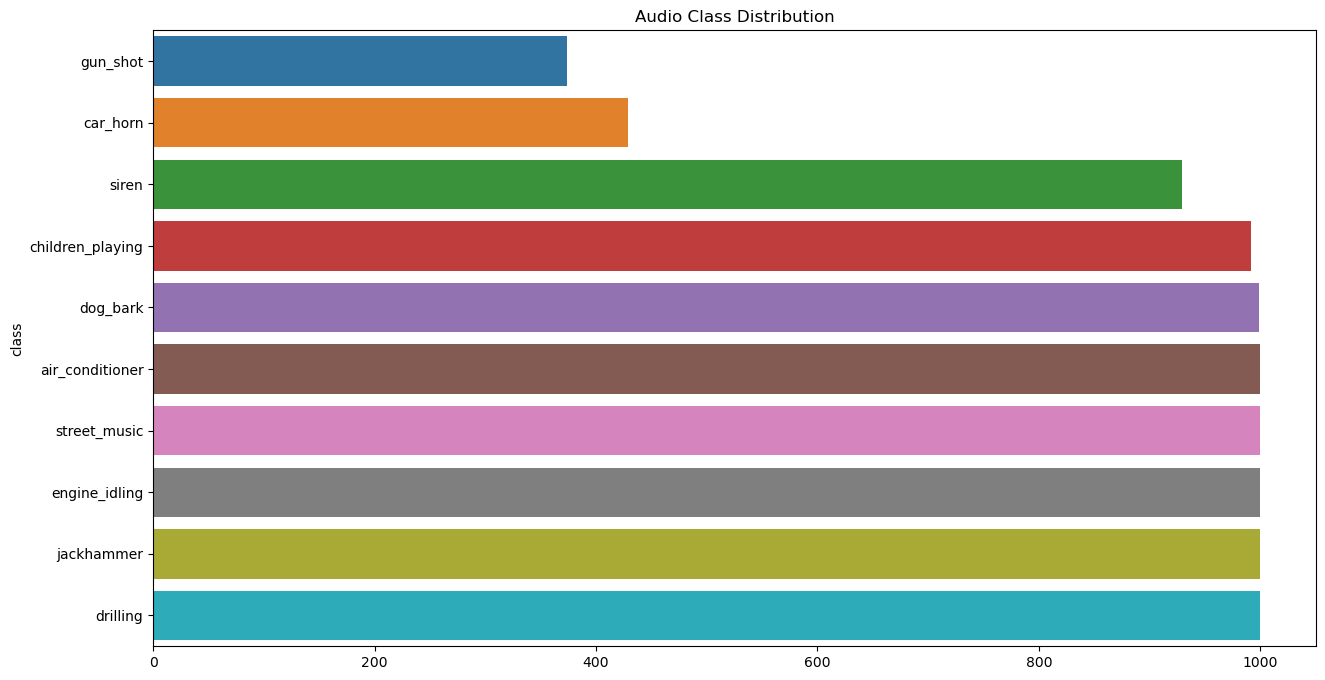

In [22]:
plt.figure(figsize=(15,8))
plt.title('Audio Class Distribution')
class_dist = metadata['class'].value_counts().sort_values()
sns.barplot(x=class_dist.values,
           y=class_dist.keys())
plt.show()

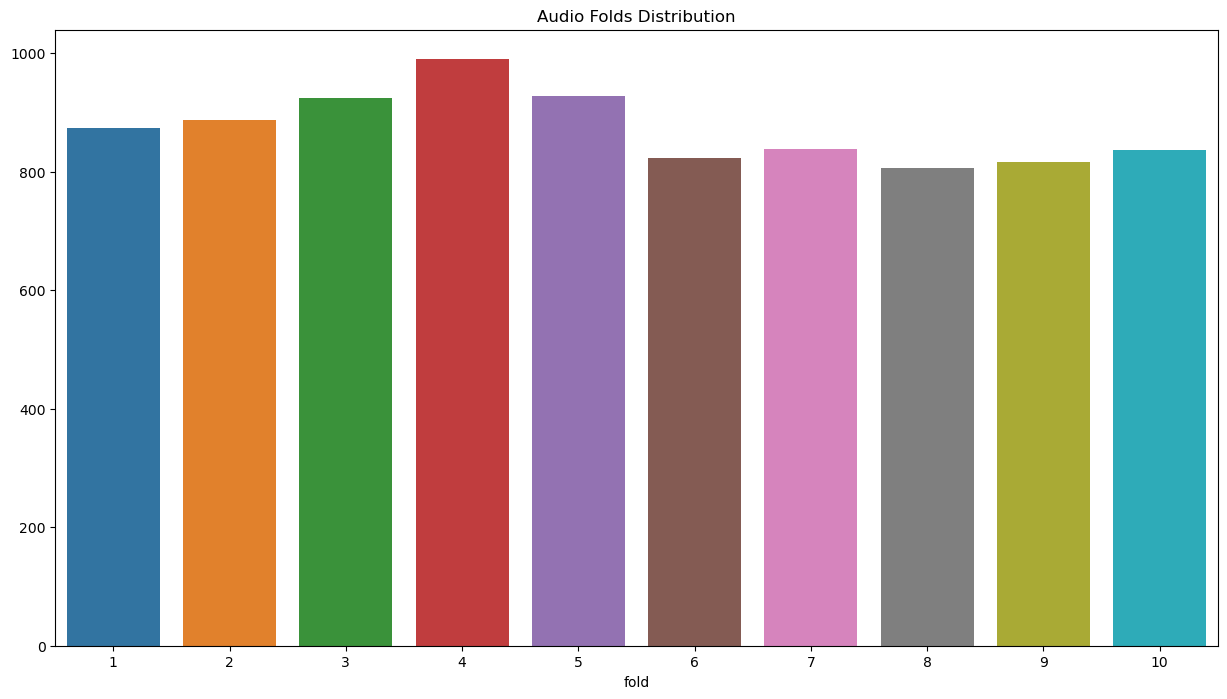

In [23]:
plt.figure(figsize=(15,8))
plt.title('Audio Folds Distribution')
folds_dist = metadata['fold'].value_counts().sort_values()
sns.barplot(y=folds_dist.values,
           x=folds_dist.keys())
plt.show()

In [24]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=50)
mfccs

array([[-3.2162250e+02, -2.5684540e+02, -2.4672139e+02, ...,
        -4.0194836e+02, -4.0807272e+02, -4.3510498e+02],
       [ 1.6920757e+02,  1.6716632e+02,  1.5238861e+02, ...,
         1.6923880e+02,  1.5861362e+02,  1.5013846e+02],
       [ 5.1523414e+00, -2.2868053e+01, -3.6243896e+01, ...,
         1.5111916e+01,  9.5673237e+00,  1.3778051e+01],
       ...,
       [ 2.2587063e+00,  2.2857983e+00, -1.2548125e+00, ...,
        -5.4568057e+00, -2.0475492e+00,  8.1714725e-01],
       [-3.2296524e+00, -5.3279214e+00, -3.7943711e+00, ...,
        -9.2892542e+00, -2.5602565e+00,  2.0359677e-01],
       [-1.8930984e+00, -6.2634087e+00, -8.4248886e+00, ...,
        -5.4762888e+00,  4.6949434e+00,  6.1201544e+00]], dtype=float32)

In [25]:
mfccs.shape

(50, 173)

In [26]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [27]:
audio_dataset_path='urbansound8k/audio'

In [28]:
import os
from tqdm import tqdm### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for i,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8723it [01:54, 76.49it/s] 


In [30]:
#converting extracted features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature     class
0  [-188.62563, 102.429115, -2.3306003, -10.94615...  car_horn
1  [-195.3337, 99.1228, -16.376387, 2.736345, -14...  car_horn
2  [-200.00314, 79.350815, -13.392574, 17.59861, ...  car_horn
3  [-196.05116, 90.81921, -17.248508, 14.915048, ...  car_horn
4  [-114.125336, 53.49515, -10.338029, 10.012977,...  car_horn

In [31]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [32]:
X

array([[-1.88625626e+02,  1.02429115e+02, -2.33060026e+00, ...,
         3.74973148e-01,  4.81219196e+00, -4.45278597e+00],
       [-1.95333694e+02,  9.91228027e+01, -1.63763866e+01, ...,
         8.10865045e-01, -7.91992855e+00,  5.86255026e+00],
       [-2.00003143e+02,  7.93508148e+01, -1.33925743e+01, ...,
         1.80107939e+00, -7.26521111e+00,  2.32212409e-01],
       ...,
       [-2.97315338e+02,  1.02090263e+02, -3.67510796e+01, ...,
         2.20239830e+00,  1.95113850e+00, -3.40594977e-01],
       [-3.36923859e+02,  1.15313904e+02, -4.48470917e+01, ...,
         3.53287160e-01, -1.25762606e+00, -1.70473576e+00],
       [-3.07417603e+02,  8.33067322e+01, -2.57565117e+01, ...,
         4.89573479e+00, -4.30078840e+00, -7.42102957e+00]], dtype=float32)

In [33]:
X.shape

(8723, 50)

In [34]:
y

array(['car_horn', 'car_horn', 'car_horn', ..., 'car_horn', 'car_horn',
       'car_horn'], dtype='<U16')

In [35]:
y.shape

(8723,)

In [36]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [38]:
X_train.shape

(7414, 50)

In [39]:
X_test.shape

(1309, 50)

In [40]:
y_train.shape

(7414, 10)

In [41]:
y_test.shape

(1309, 10)

In [42]:
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ",X_test.shape[0])

Number of training samples =  7414
Number of testing samples =  1309


In [43]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
#No of classes
num_labels = y.shape[1]
num_labels

10

In [46]:
model = Sequential()
# first layer
model.add(Dense(256,input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [47]:
!pip install pydot


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,826 (698.54 KB)

 Trainable params: 178,826 (698.54 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [50]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

In [52]:
training = model.fit(X_train,
                     y_train,
                     batch_size=num_batch_size,
                     epochs=num_epochs,
                    validation_data=(X_test,y_test))

Epoch 1/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1373 - loss: 18.1054 - val_accuracy: 0.1467 - val_loss: 2.2664
Epoch 2/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1723 - loss: 2.4339 - val_accuracy: 0.1406 - val_loss: 2.2378
Epoch 3/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2048 - loss: 2.1921 - val_accuracy: 0.2124 - val_loss: 2.0646
Epoch 4/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2460 - loss: 2.0814 - val_accuracy: 0.3644 - val_loss: 1.8115
Epoch 5/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3233 - loss: 1.8902 - val_accuracy: 0.3728 - val_loss: 1.7188
Epoch 6/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3530 - loss: 1.8117 - val_accuracy: 0.4966 - val_loss: 1.5681
Epoch 7/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4276 - loss: 1.6475 - val_accuracy: 0.4950 - val_loss: 1.4711
Epoch 8/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4626 - loss: 1.5718 - val_acc

In [53]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9029793739318848


In [54]:
train_hist = pd.DataFrame(training.history)
train_hist

accuracy      loss  val_accuracy  val_loss
0    0.144052  8.407670      0.146677  2.266448
1    0.185460  2.353255      0.140565  2.237841
2    0.212706  2.168149      0.212376  2.064642
3    0.262611  2.032326      0.364400  1.811455
4    0.328298  1.889190      0.372804  1.718831
..        ...       ...           ...       ...
145  0.857837  0.454867      0.903743  0.339602
146  0.853655  0.468174      0.909855  0.344101
147  0.852037  0.474947      0.902215  0.353068
148  0.859590  0.456842      0.906035  0.350350
149  0.857567  0.453364      0.902979  0.347578

[150 rows x 4 columns]

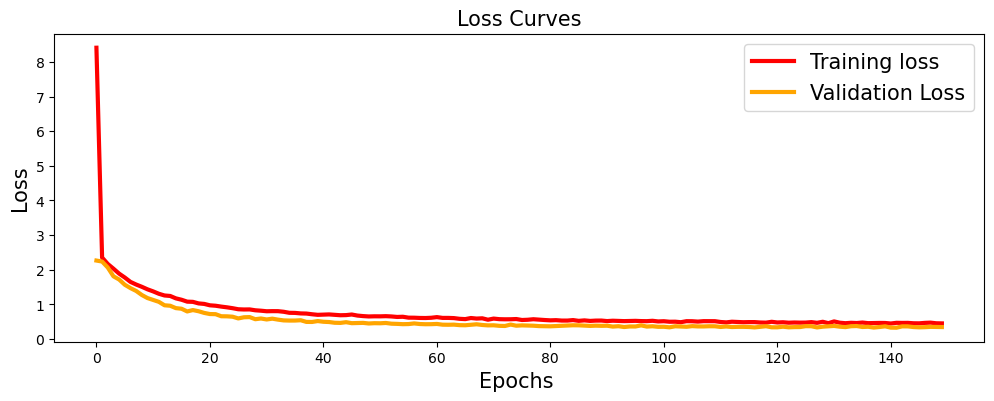

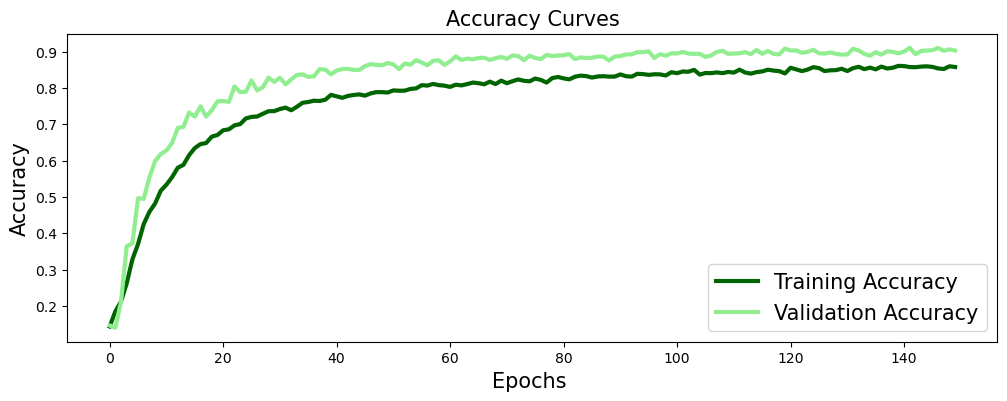

In [55]:
# Loss curves
plt.figure(figsize=[12,4])
plt.plot(training.history['loss'],'red',linewidth=3.0)
plt.plot(training.history['val_loss'],'orange',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)


# Accuracy Curves
plt.figure(figsize=[12,4])
plt.plot(training.history['accuracy'],'darkgreen',linewidth=3.0)
plt.plot(training.history['val_accuracy'],'lightgreen',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.show()

In [56]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))


Confusion Matrix :


[[139   0   1   0   0   0   0   1   1   5]
 [  0  71   1   2   0   0   0   1   0   2]
 [  1   0 124   5   1   0   0   1   2   9]
 [  0   0  10 128   2   2   2   0   4   5]
 [  1   0   1   4 145   1   0   5   0   3]
 [  2   0   5   0   0 132   0   0   1   0]
 [  0   0  11   2   0   0  36   0   0   1]
 [  0   0   0   0   2   0   0 136   0   1]
 [  0   0   1   1   0   0   0   0 125   2]
 [  0   1  12   5   0   3   0   1   3 146]]


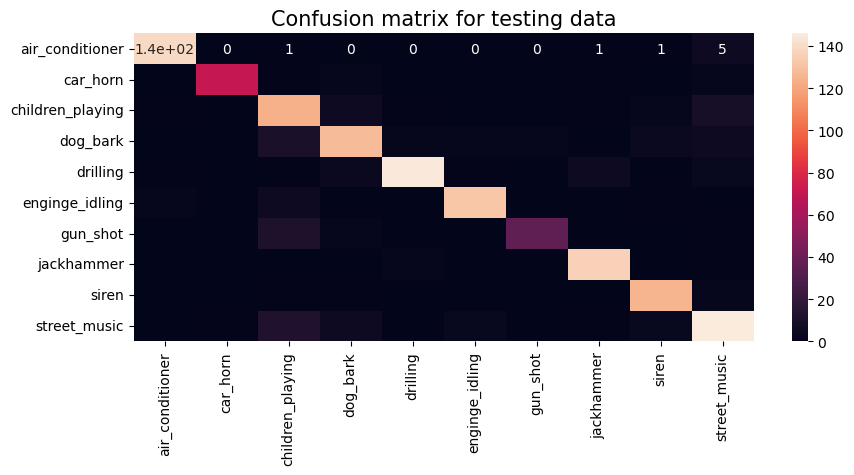

In [58]:
plt.figure(figsize=(10,4))
plt.title("Confusion matrix for testing data", fontsize = 15)
plt.xlabel("Predicted class")
plt.ylabel("True class")
sns.heatmap(confusion_matrix(ytrue,ypred),annot=True,
           xticklabels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'],
           yticklabels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'])

plt.show()

In [59]:
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))



Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       147
           1       0.99      0.92      0.95        77
           2       0.75      0.87      0.80       143
           3       0.87      0.84      0.85       153
           4       0.97      0.91      0.94       160
           5       0.96      0.94      0.95       140
           6       0.95      0.72      0.82        50
           7       0.94      0.98      0.96       139
           8       0.92      0.97      0.94       129
           9       0.84      0.85      0.85       171

    accuracy                           0.90      1309
   macro avg       0.91      0.89      0.90      1309
weighted avg       0.91      0.90      0.90      1309



In [60]:
X_test[1]

array([-4.1500843e+01,  5.7065544e+01,  2.8125000e+01,  2.3622034e+01,
        1.3738060e+01, -4.8100324e+00, -9.7527008e+00, -9.5308590e+00,
        6.0221314e+00,  7.0112222e-01, -5.8589230e+00, -3.3983231e-01,
       -4.0496531e+00,  3.4615996e+00, -1.6772150e+01,  2.5245659e+00,
        3.4636836e-02, -6.7525797e+00,  6.1339223e-01,  1.1596361e+00,
        2.6231238e-01, -1.1932635e+00, -4.9498525e+00,  2.5123508e+00,
       -1.7108119e+00,  2.3163896e+00, -2.9427457e+00,  2.4258189e+00,
       -3.5852561e+00, -2.7788790e-02, -1.4438150e+00,  2.0460033e+00,
       -2.2730441e+00,  1.9626098e+00, -3.4823720e+00,  1.7313077e+00,
       -3.8713853e+00,  2.5139499e+00, -1.3195083e+00,  2.8824127e-01,
       -3.2021198e-01, -1.5909870e+00, -2.3650153e+00,  1.4928522e+00,
       -3.6274807e+00,  1.0180399e+00, -4.3839021e+00, -9.1625136e-01,
       -3.1824179e+00,  2.4194405e+00], dtype=float32)

In [61]:
filename = 'urbansound8k/metadata/fold5/190893-2-0-11.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
np.argmax(model.predict(prediction_feature),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([1], dtype=int64)

In [62]:
prediction_feature.shape

(1, 50)

In [63]:
np.argmax(model.predict(X_test),axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 7, 4, ..., 5, 8, 8], dtype=int64)

In [64]:
filename = "urbansound8k/dog_bark.wav"
audio,sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=50)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [65]:
mfccs_scaled_features

array([-3.9719086e+02,  1.4185944e+02,  1.0558332e+01, -9.9327517e+00,
       -7.8941960e+00,  7.3874693e+00, -1.0039094e+01, -7.3609910e+00,
       -3.3826764e+00, -5.8134236e+00, -2.2403669e+00, -3.6441901e+00,
        5.3192582e+00,  9.0746870e+00,  9.7898293e+00,  1.2648435e+01,
        2.4931533e+00, -1.7285068e-01,  2.0130618e+00,  1.8784222e-01,
        1.6082820e-01, -2.1331635e+00, -4.2852650e+00, -7.6782280e-01,
        4.3873268e-01,  1.5730150e+00,  1.4616210e+00,  2.6489193e+00,
        4.3564291e+00,  1.9619033e+00, -2.1841105e-02,  7.9192236e-02,
        1.8715240e+00,  1.2239143e+00,  9.7850196e-02, -8.2912856e-01,
       -2.6153555e+00, -1.6491376e+00, -1.4185854e+00,  4.4883189e-01,
        1.4302305e+00,  9.8457776e-02, -7.5005105e-04, -1.3067179e+00,
       -1.8598001e+00, -9.6791238e-01, -6.2823492e-01,  7.4809009e-01,
       -1.0106643e+00, -1.1727822e+00], dtype=float32)

In [66]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
mfccs_scaled_features

array([[-3.9719086e+02,  1.4185944e+02,  1.0558332e+01, -9.9327517e+00,
        -7.8941960e+00,  7.3874693e+00, -1.0039094e+01, -7.3609910e+00,
        -3.3826764e+00, -5.8134236e+00, -2.2403669e+00, -3.6441901e+00,
         5.3192582e+00,  9.0746870e+00,  9.7898293e+00,  1.2648435e+01,
         2.4931533e+00, -1.7285068e-01,  2.0130618e+00,  1.8784222e-01,
         1.6082820e-01, -2.1331635e+00, -4.2852650e+00, -7.6782280e-01,
         4.3873268e-01,  1.5730150e+00,  1.4616210e+00,  2.6489193e+00,
         4.3564291e+00,  1.9619033e+00, -2.1841105e-02,  7.9192236e-02,
         1.8715240e+00,  1.2239143e+00,  9.7850196e-02, -8.2912856e-01,
        -2.6153555e+00, -1.6491376e+00, -1.4185854e+00,  4.4883189e-01,
         1.4302305e+00,  9.8457776e-02, -7.5005105e-04, -1.3067179e+00,
        -1.8598001e+00, -9.6791238e-01, -6.2823492e-01,  7.4809009e-01,
        -1.0106643e+00, -1.1727822e+00]], dtype=float32)

In [67]:
mfccs_scaled_features.shape

(1, 50)

In [68]:
predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)
predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([3], dtype=int64)

In [69]:
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

array(['dog_bark'], dtype='<U16')

In [70]:
ipd.Audio(filename)

In [71]:
def predict(filename):
    audio, sample_rate = librosa.load(filename) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)
    prediction_class = labelencoder.inverse_transform(predicted_label)
    print(prediction_class)
    return ipd.Audio(filename)

In [74]:
predict('urbansound8k/dog_bark.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
['dog_bark']


In [73]:
predict('urbansound8k/horn.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['car_horn']


In [86]:
predict('urbansound8k/auto.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
['car_horn']


In [88]:
predict('urbansound8k/audio/fold3/103199-4-2-0.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
['drilling']


In [75]:
predict('urbansound8k/dog_bark.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
['dog_bark']


In [76]:
model.save('model.keras')

In [77]:
import joblib
joblib.dump(labelencoder, 'labelencoder.joblib')

['labelencoder.joblib']